# Happywhale - Let's explore the largest mammal 

**Problem:** As per my understanding, We are dealing with the problem to recognize the whales and dolphine using the jpg image provided containg the hump images.

**Output format:** We have to suggest 5 id and also include `new_individual` as one of the 5 ids. 

**Note:-** *I am not in the field of pure biology, so there can be  mistake with species and class, but i will try to make it readable for common public*


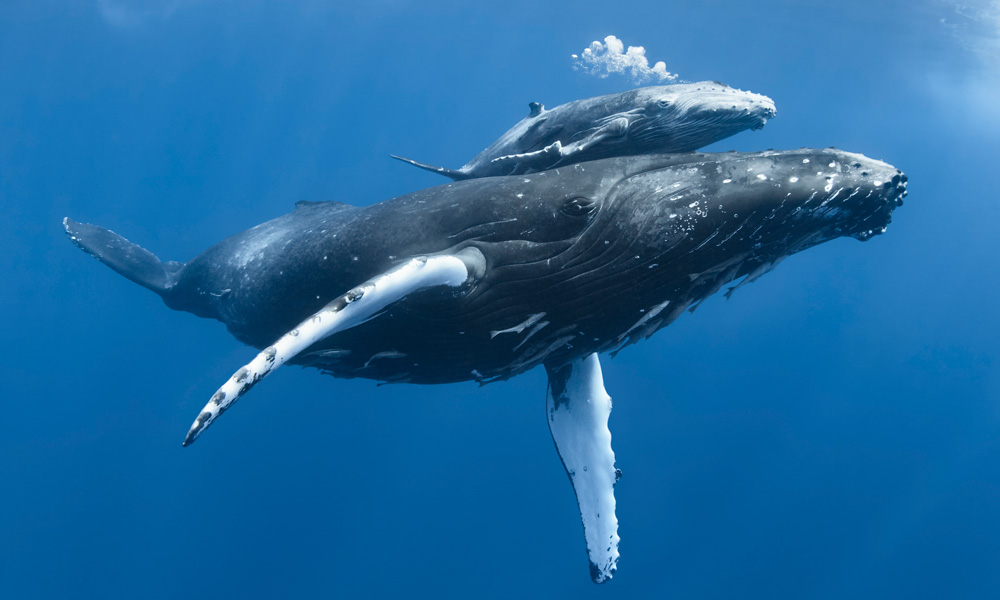



# Introduction 

We all know that the color of creature living inside the sea are way similar and most of the time large mammal like whale are not visible from a long distance, The task of identiying the whale mannualy is hectic and some time confusing. So in this notebook we are going to explore various image segmentation technique as well as image classification technique to predict the ids involve with particular given images.

In [ ]:
# importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# reading the train file consisting of file_name, species_name and individual_id in csv
train_df = pd.read_csv("../input/happy-whale-and-dolphin/train.csv")
submission_df = pd.read_csv("../input/happy-whale-and-dolphin/sample_submission.csv")

In [ ]:
train_df.head()

# Exploring the available Data

Let's explore the data

In [ ]:
print( f"\x1b[6;30;42mSpecies of Whale and Dolphin  in train file:\x1b[0m \x1b[2;37;41m{train_df.species.nunique()}\n")
print(f"\x1b[6;30;42mIndividual IDs in train file:\x1b[0m \x1b[2;37;41m{train_df.individual_id.nunique()}\n")
print(f"\x1b[6;30;42mImages in train images folder:\x1b[0m \x1b[2;37;41m{len(os.listdir('../input/happy-whale-and-dolphin/train_images'))}\n")
print(f"\x1b[6;30;42mImages in test images folder:\x1b[0m \x1b[2;37;41m{len(os.listdir('../input/happy-whale-and-dolphin/test_images'))}")

In [ ]:
# Let's look at the list of whale and dhophin species present 

print(f"\x1b[3;31;47mList of Species:\x1b[0m {train_df.species.unique()}")



Looking at the data we are provided with some images of whale and dolphine

* `beluga` and `globis` both are whale 
*  We can identify the species with the help of suffix mentioned  i.e. `blue_whale` and `common_dolphin`
* There are some mistake in the suffix name like instead of `dolphin` , `dolpin` and `killer` , `kiler` is written, so we can correct those in the beginning

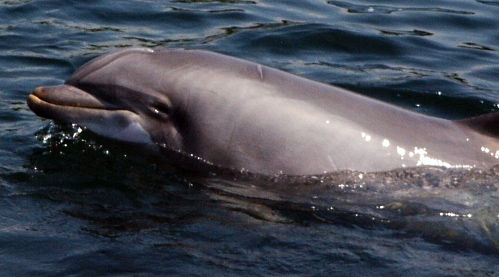

In [ ]:
train_df.loc[train_df.species.str.contains('beluga'), 'species'] = 'beluga_whale'
train_df.loc[train_df.species.str.contains('globis'), 'species'] = 'globis_whale'

train_df['species'] = train_df['species'].str.replace('bottlenose_dolpin','bottlenose_dolphin')
train_df['species'] = train_df['species'].str.replace('kiler_whale','killer_whale')

Let's seperate the species in two class `dolphin` and `whale`

In [ ]:
train_df['class'] = train_df.species.map(lambda x: 'dolphin' if 'dolphin' in x else 'whale')

In [ ]:
# Let's look at the train image by species class
class_count = train_df.groupby(['class']).size().reset_index(name='counts')
plt.pie(class_count['counts'], labels = class_count['class'],autopct='%1.1f%%',shadow = True)
plt.title("Pie Chart showing the distribution of species in class - not biological")
plt.legend(loc='lower right')
plt.show() 

Let's Explore more in the train data. Listing out top 10 Individual id's

In [ ]:
top_ten_ids = train_df.individual_id.value_counts().head(10)
top_ten_ids = pd.DataFrame({'individual_id':top_ten_ids.index, 'frequency':top_ten_ids.values})
plt.bar(top_ten_ids['individual_id'],top_ten_ids['frequency'],width = 0.8,color='maroon')
plt.xticks(rotation=90)
plt.ylabel("frequency")
plt.xlabel("Individual Ids")
plt.title("Top 10 Individual Ids used by frequency")
plt.grid(visible = True, color ='grey',linestyle ='-', linewidth = 0.9,alpha = 0.3)